In [1]:
# demo push

In [2]:
import pandas as pd
import numpy as np
import timeit
import random
import datetime as dt


import re


In [ ]:
# pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# Question 1
###### Write a Python script that generate 100 million (100000000) random numbers and add 
###### them all together with and without use of numpy  and Check how long it takes to 
###### execute in both the scenarios? 

In [3]:
%%timeit
def sum_numbers_without_numpy(num):
    random_numbers=[random.random() for _ in range(num)]
    total_sum=sum(random_numbers)
    return total_sum
sum_numbers_without_numpy(100000)

8.02 ms ± 516 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
%%timeit
def sum_numbers_with_numpy(num):
    random_numbers=np.random.random(num)
    total_sum=sum(random_numbers)
    return total_sum
sum_numbers_with_numpy(100000)


8.47 ms ± 88.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Question 2
###### Write a Python script that generate matrix of (10000, 10000) and transpose it. 

In [5]:
matrix=np.random.randint(5,size=(10000,10000))
print(f'Length of matrix = {len(matrix)}')
print(matrix[0],matrix[601],matrix[9999])
print(f'Dimension of matrix={matrix.ndim}')

# Transpose of matrix
print(matrix.transpose())

Length of matrix = 10000
[4 1 4 ... 3 2 4] [2 2 4 ... 1 4 0] [4 4 3 ... 3 2 4]
Dimension of matrix=2
[[4 4 2 ... 3 1 4]
 [1 4 2 ... 3 2 4]
 [4 1 3 ... 4 1 3]
 ...
 [3 0 2 ... 1 2 3]
 [2 1 1 ... 3 4 2]
 [4 2 4 ... 2 3 4]]


## Question 3
###### Load the dataset “Online_Retail” provided into pandas dataframe.   
###### o Process any missing values. Create descriptive statistics.(Use of numpy)   
###### o Plot time series of price using pandas functionality. Filter transactions based on date. 
###### o Plot time series chart of price where quantity less than 1000 and in year 2011. 
###### o Calculate total amount of price in pivot table based on product description. 
###### o Which country has highest price and for which product? 
###### o Calculate top 10 products with minimum price and in year 2010. 

In [6]:
# Load the Online_Retail Dataset
df=pd.read_csv('Online_Retail.csv')

In [7]:
# check information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437885 entries, 0 to 437884
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      437885 non-null  object 
 1   StockCode    437885 non-null  object 
 2   Description  435162 non-null  object 
 3   Quantity     437885 non-null  int64  
 4   InvoiceDate  437885 non-null  object 
 5   Price        437885 non-null  float64
 6   Customer ID  327110 non-null  float64
 7   Country      437885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 26.7+ MB


In [8]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2723
Quantity            0
InvoiceDate         0
Price               0
Customer ID    110775
Country             0
dtype: int64

In [9]:
# fill missing values
df.fillna(0,inplace=True)

In [10]:
# Create a descriptive statistics
des_stat=df.describe()
print(des_stat)

            Quantity          Price    Customer ID
count  437885.000000  437885.000000  437885.000000
mean       10.063069       4.955867   11436.712984
std       184.048278     128.396016    6815.234178
min    -74215.000000  -53594.360000       0.000000
25%         1.000000       1.250000       0.000000
50%         3.000000       2.100000   14396.000000
75%        10.000000       4.250000   16253.000000
max     74215.000000   25111.090000   18287.000000


In [11]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
437880,C553031,22300,COFFEE MUG DOG + BALL DESIGN,-1,12-05-2011 19:43,2.55,13908.0,United Kingdom
437881,C553031,21533,RETROSPOT LARGE MILK JUG,-3,12-05-2011 19:43,4.95,13908.0,United Kingdom
437882,C553031,21240,BLUE POLKADOT CUP,-3,12-05-2011 19:43,0.85,13908.0,United Kingdom
437883,C553032,22891,TEA FOR ONE POLKADOT,-3,12-05-2011 19:44,4.25,13320.0,United Kingdom


In [12]:
# Calculate total amount of price in pivot table based on product description. 

In [13]:
df['TotalAmount']=df['Quantity']*df['Price']

In [14]:
df[['Quantity','Price','TotalAmount']]

,Quantity,Price,TotalAmount
0,12,6.95,83.40
1,12,6.75,81.00
2,12,6.75,81.00
3,48,2.10,100.80
4,24,1.25,30.00
...,...,...,...
437880,-1,2.55,-2.55
437881,-3,4.95,-14.85
437882,-3,0.85,-2.55
437883,-3,4.25,-12.75


In [15]:
df['TotalAmount']

0          83.40
1          81.00
2          81.00
3         100.80
4          30.00
           ...  
437880     -2.55
437881    -14.85
437882     -2.55
437883    -12.75
437884     -5.85
Name: TotalAmount, Length: 437885, dtype: float64

In [16]:
table=df.pivot_table(values='TotalAmount',index='Description',aggfunc=sum)

C:\Users\RushikeshSuryagandh\AppData\Local\Temp\ipykernel_42264\644185312.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table=df.pivot_table(values='TotalAmount',index='Description',aggfunc=sum)


In [17]:
print(table)

                                     TotalAmount
Description                                     
0                                           0.00
  DOORMAT UNION JACK GUNS AND ROSES      1206.81
 3 STRIPEY MICE FELTCRAFT                1328.38
 4 PURPLE FLOCK DINNER CANDLES             73.87
 ANIMAL STICKERS                           80.85
...                                          ...
wrong ctn size                              0.00
wrong invc                                  0.00
wrongly sold (22719) barcode                0.00
wrongly sold as sets                        0.00
wrongly sold sets                           0.00

[4808 rows x 1 columns]


In [18]:
# country having highest prize
"""
    select the price column from dataframe df[price],idxmax() - index of the maximum value , loc()- retrive the entire row
"""
max_price_of_row=df.loc[df['Price'].idxmax()]
min_price_of_row=df.loc[df['Price'].idxmin()]
print(f'Country_having_maximum_price:{max_price_of_row['Country']}\n Price:{max_price_of_row['Price']} \n Description:{max_price_of_row['Description']}')
print(f'Country_having_maximum_price:{min_price_of_row['Country']}\n Price:{min_price_of_row['Price']}\n Description:{min_price_of_row['Description']}')


Country_having_maximum_price:United Kingdom
 Price:25111.09 
 Description:Manual
Country_having_maximum_price:United Kingdom
 Price:-53594.36
 Description:Adjust bad debt


In [19]:
# For getting a 2010 year we have to format the data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

 

In [20]:
df['InvoiceDate']

0        2009-12-01 07:45:00
1        2009-12-01 07:45:00
2        2009-12-01 07:45:00
3        2009-12-01 07:45:00
4        2009-12-01 07:45:00
                 ...        
437880   2011-05-12 19:43:00
437881   2011-05-12 19:43:00
437882   2011-05-12 19:43:00
437883   2011-05-12 19:44:00
437884   2011-05-12 19:44:00
Name: InvoiceDate, Length: 437885, dtype: datetime64[ns]

In [21]:
year_2010_data=df[df['InvoiceDate'].dt.year==2010]

In [22]:
top_10_highest_price=year_2010_data.nlargest(10,'Price')
print(top_10_highest_price)

        Invoice  StockCode Description  Quantity         InvoiceDate  \
241824  C512770          M      Manual        -1 2010-06-17 16:52:00   
241827   512771          M      Manual         1 2010-06-17 16:53:00   
264590  C537630  AMAZONFEE  AMAZON FEE        -1 2010-12-07 15:04:00   
264591   537632  AMAZONFEE  AMAZON FEE         1 2010-12-07 15:08:00   
265930  C537651  AMAZONFEE  AMAZON FEE        -1 2010-12-07 15:49:00   
265576  C537644  AMAZONFEE  AMAZON FEE        -1 2010-12-07 15:34:00   
135012  C502262          M      Manual        -1 2010-03-23 15:20:00   
135013   502263          M      Manual         1 2010-03-23 15:22:00   
135014  C502264          M      Manual        -1 2010-03-23 15:24:00   
135015   502265          M      Manual         1 2010-03-23 15:28:00   

           Price  Customer ID         Country  TotalAmount  
241824  25111.09      17399.0  United Kingdom    -25111.09  
241827  25111.09          0.0  United Kingdom     25111.09  
264590  13541.33        

In [23]:
top_10_highest_price=year_2010_data.nsmallest(10,'Price')
print(top_10_highest_price)

        Invoice StockCode      Description  Quantity         InvoiceDate  \
179403  A506401         B  Adjust bad debt         1 2010-04-29 13:36:00   
45714    493494     21231                0       -84 2010-01-04 14:56:00   
45715    493508     20887                0         9 2010-01-04 15:08:00   
45716    493510    40046C                0         7 2010-01-04 15:08:00   
45717    493509     21558                0         7 2010-01-04 15:08:00   
45718    493513     47009                0         3 2010-01-04 15:09:00   
45719    493511    84753A                0        89 2010-01-04 15:09:00   
45720    493512     37509                0         3 2010-01-04 15:09:00   
45721    493514     20911                0         2 2010-01-04 15:09:00   
45722    493516     35990                0         2 2010-01-04 15:11:00   

           Price  Customer ID         Country  TotalAmount  
179403 -53594.36          0.0  United Kingdom    -53594.36  
45714       0.00          0.0  United Kin

<Axes: title={'center': 'Time Series of Price'}, xlabel='InvoiceDate'>

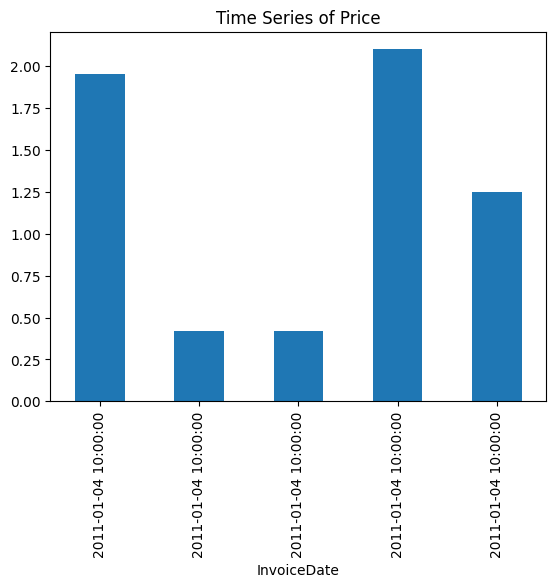

In [24]:
# Filter the DataFrame for rows where 'Quantity' is less than 1000 and 'InvoiceDate' is in the year 2011
new_dataframe=df[(df["Quantity"]<1000) & (df["InvoiceDate"].dt.year==2011)]
 
# Set the 'InvoiceDate' column as the index of the filtered DataFrame
new_dataframe.set_index("InvoiceDate",inplace=True)
 
# Plot the first 15 rows of the 'Price' column as a bar chart
# 'x' and 'y' parameters are not needed here as the index is already set to 'InvoiceDate'
new_dataframe.head(5)["Price"].plot(title="Time Series of Price",kind="bar")

<Axes: title={'center': 'Time Series of Price'}, xlabel='InvoiceDate'>

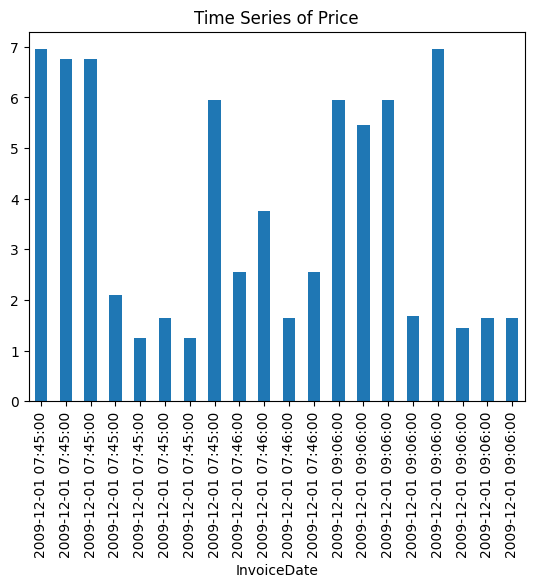

In [25]:
start_date = "2009-12-01"   # The start date
end_date = "2009-12-02"     # The end date
df_filtered=df[(df["InvoiceDate"] >= start_date) & (df["InvoiceDate"]<=end_date)]   # storing only the dates between start and end date
 
# Set the 'InvoiceDate' column as the index of the DataFrame
# This is useful for time series analysis and operations that require date-based indexing
df_filtered.set_index("InvoiceDate",inplace=True)  
 
# Plot the first 20 rows of the 'Price' column as a bar chart
# 'x' and 'y' parameters are not needed here as the index is already set to 'InvoiceDate'
df_filtered.head(20)["Price"].plot(x="InvoiceDate", y="Price",title="Time Series of Price",kind="bar")

## Question 4
###### Write python program to extract email address from dataframe column. Please use following sample dataframe.

In [26]:
# Extract Email address from dataframe column
data={"Company Name": ["ABC Inc.", "XYZ Corporation", "Tech Solutions Ltd.", "Global Services LLC", "Innovative Ventures"],
 "Description": ["Contact us rushi@gmail.com at info@abcinc.com for more information. ",
 "For inquiries, email us at contact@xyzcorp.com.",
 "Tech Solutions Ltd. provides support via support@techsolutions.com.",
 "Reach out to us at info@globalservicesllc.net for business inquiries.",
 "Email us at hello@innovativeventures.org for partnership opportunities."
]}


In [27]:
# Import re model
# create a dataframe
email_df=pd.DataFrame(data)
print(email_df)

          Company Name                                        Description
0             ABC Inc.  Contact us rushi@gmail.com at info@abcinc.com ...
1      XYZ Corporation    For inquiries, email us at contact@xyzcorp.com.
2  Tech Solutions Ltd.  Tech Solutions Ltd. provides support via suppo...
3  Global Services LLC  Reach out to us at info@globalservicesllc.net ...
4  Innovative Ventures  Email us at hello@innovativeventures.org for p...


In [28]:
def get_email(text):
    
    """Take a string as a input and use re.findall() method to search 
       [\w\.-]+  - match the one or more word charecters(\w),dots(.) and (-) before the @ 
       @ - match the @ symbol
       [\w\.-]+  - match the one or more word charecters(\w),dots(.) and (-) after the @ 
    Args:
        text (str): contails a string 

    Returns:
      list  : all occurences of email addresses in string
    """
    return re.findall(r'[\w\.-]+@[\w\.-]+',text)
email_df['Emails']=email_df['Description'].apply(get_email)
print(email_df['Emails'])

0    [rushi@gmail.com, info@abcinc.com]
1                [contact@xyzcorp.com.]
2          [support@techsolutions.com.]
3          [info@globalservicesllc.net]
4        [hello@innovativeventures.org]
Name: Emails, dtype: object


<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\RushikeshSuryagandh\AppData\Local\Temp\ipykernel_42264\1327711806.py:3: SyntaxWarning: invalid escape sequence '\w'
  """Take a string as a input and use re.findall() method to search


## Question 5
###### Write function which takes string as input and returns dictionary that contains each 
###### word and its frequency. Take input from user and use regex for matching patterns 
###### E.g text = "Hello world, hello python. Python is a programming language."

In [29]:
# word frequency counter using regx
text=' Hello world , hello python,Python is a programming language'
def word_frequency_counter(text):
    """Print the count of each word and store it in ditionary using regular ecpressions
    create a emapty dictionary to store a count , \b - matches word boundary , \w+ - matches one or more word charecters , \b - matches another word boundary

    Args:
        text (str): simple string to text the function

    Returns:
        dict: return dictionary having count of each word
    """
    dict1={}
    words=re.findall(r'\b\w+\b',text.lower())
    for word in words:
        if word in dict1:
            dict1[word]+=1
        else:
            dict1[word]=1
    return dict1
print(word_frequency_counter(text))

{'hello': 2, 'world': 1, 'python': 2, 'is': 1, 'a': 1, 'programming': 1, 'language': 1}


<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\RushikeshSuryagandh\AppData\Local\Temp\ipykernel_42264\2695945725.py:4: SyntaxWarning: invalid escape sequence '\w'
  """Print the count of each word and store it in ditionary using regular ecpressions
